<a href="https://colab.research.google.com/github/Tejaswini-AnalyticsExpert/Supply-Chain-Management/blob/main/Item_Level_Complaince_846_%26_852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Compliance_Status,Count,Percentage
0,Receiving data,849,64.710366
1,No inventory,458,34.908537
2,Other,5,0.381098


🏭 Total Non-Compliant (Supplier+Location+Category): 197


,Supplier Name,Location,Item Category,Non_Compliance_Count
178,THE COCA-COLA COMPANY,19529 - COLUMBUS,BEVERAGE,20
180,THE COCA-COLA COMPANY,19555 - DALLAS,BEVERAGE,17
191,THE COCA-COLA COMPANY,32400 - ONTARIO,BEVERAGE,15
182,THE COCA-COLA COMPANY,19607 - PORTLAND,BEVERAGE,14
176,THE COCA-COLA COMPANY,16905 - ALLENTOWN,BEVERAGE,12
184,THE COCA-COLA COMPANY,19646 - KAPOLEI,BEVERAGE,12
186,THE COCA-COLA COMPANY,20049 - ATLANTA,BEVERAGE,12
145,SAPUTO CHEESE USA INC.,43218 - MODESTO,DAIRY,7
163,TAYLOR FARMS PLANT,26770 - SALINAS,PRODUCE,7
76,INTERNATIONAL PROMOTIONS LEADERSHIP L.P,19796 - COMPTON,NON PRODUCT YOUTH,6


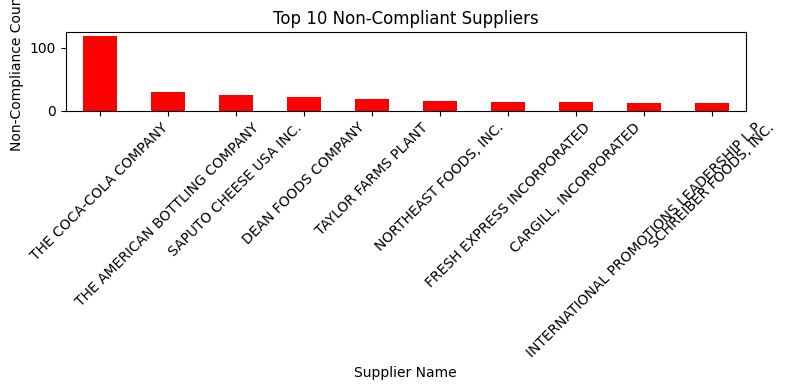


✅ Report saved to: /content/846_Item_Level_Compliance_Report.xlsx


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

file_path = "/content/Details.xlsx"
df = pd.read_excel(file_path)

df['Latest Inventory Date (846)'] = pd.to_datetime(df['Latest Inventory Date (846)'], errors='coerce')

df['Year'] = df['Latest Inventory Date (846)'].dt.year
current_year = datetime.now().year
previous_year = current_year - 1

current_suppliers = set(df[df['Year'] == current_year]['Supplier Name'].dropna())
previous_suppliers = set(df[df['Year'] == previous_year]['Supplier Name'].dropna())
stopped_sending = previous_suppliers - current_suppliers

def classify(row):
    if pd.isna(row['Latest Inventory Date (846)']):
        return "No inventory"
    elif row['Supplier Name'] in stopped_sending:
        return "Not receiving data for that ITEM/WSI"
    elif row['Year'] == current_year:
        return "Receiving data"
    else:
        return "Other"

df['Compliance_Status'] = df.apply(classify, axis=1)

summary_data = df['Compliance_Status'].value_counts().reset_index()
summary_data.columns = ['Compliance_Status', 'Count']
summary_data['Count'] = pd.to_numeric(summary_data['Count'], errors='coerce')
summary_data['Percentage'] = (summary_data['Count'] / summary_data['Count'].sum()) * 100

display(summary_data)

fig = px.pie(
    summary_data,
    names='Compliance_Status',
    values='Count',
    color='Compliance_Status',
    color_discrete_map={
        'Receiving data': '#4CAF50',
        'Not receiving data for that ITEM/WSI': '#9E9E9E',
        'No inventory': '#F44336',
        'Other': '#607D8B'
    },
    title=f"Overall 846 Compliance Summary ({previous_year} → {current_year})",
    hole=0.3
)
fig.update_traces(textinfo='percent+label', pull=[0.02, 0.05, 0.1, 0])
fig.show()

non_compliant_df = df[df['Compliance_Status'].isin(['Not receiving data for that ITEM/WSI', 'No inventory'])]
report = non_compliant_df.groupby(['Supplier Name', 'Location', 'Item Category']).size().reset_index(name='Non_Compliance_Count').sort_values('Non_Compliance_Count', ascending=False)

print(f"🏭 Total Non-Compliant (Supplier+Location+Category): {len(report)}")
display(report.head(20))

if not report.empty:
    top_suppliers = report.groupby('Supplier Name')['Non_Compliance_Count'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,4))
    top_suppliers.plot(kind='bar', color='red')
    plt.title("Top 10 Non-Compliant Suppliers")
    plt.xlabel("Supplier Name")
    plt.ylabel("Non-Compliance Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

output_path = "/content/846_Item_Level_Compliance_Report.xlsx"
with pd.ExcelWriter(output_path) as writer:
    summary_data.to_excel(writer, sheet_name='Overall_Summary', index=False)
    report.to_excel(writer, sheet_name='Non_Compliant_Detail', index=False)

print(f"\n✅ Report saved to: {output_path}")


,Compliance_Status,Count,Percentage
0,Not receiving PRODUCTION data,938,71.493902
1,Receiving data,247,18.826220
2,Not receiving ACT Production data,115,8.765244
3,Not receiving plan Production data,12,0.914634


🏭 Total Non-Compliant (Supplier+Location+Category): 399


,Supplier Name,Location,Item Category,Non_Compliance_Count
127,GOLDEN STATE FOODS CORP.,15122 - CITY OF INDUSTRY,LIQUID PRODUCTS,35
373,THE COCA-COLA COMPANY,20049 - ATLANTA,BEVERAGE,23
364,THE COCA-COLA COMPANY,19529 - COLUMBUS,BEVERAGE,20
15,"BAGCRAFTPAPERCON, LLC",12184 - MOUNT VERNON,WRAPS,19
366,THE COCA-COLA COMPANY,19555 - DALLAS,BEVERAGE,17
378,THE COCA-COLA COMPANY,32400 - ONTARIO,BEVERAGE,15
362,THE COCA-COLA COMPANY,16905 - ALLENTOWN,BEVERAGE,15
368,THE COCA-COLA COMPANY,19607 - PORTLAND,BEVERAGE,14
19,"BAGCRAFTPAPERCON, LLC",20727 - RENO,WRAPS,14
267,PACTIV LLC,30309 - ROMEOVILLE,COLD CUP,13


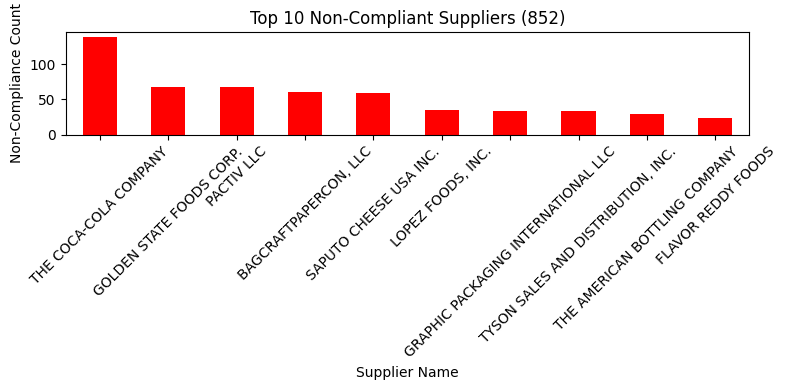


✅ 852 Report saved to: /content/852_Item_Level_Compliance_Report.xlsx


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

# Load data
file_path = "/content/Details.xlsx"
df = pd.read_excel(file_path)

# Convert to datetime
df['Latest Production Plan Date (852)'] = pd.to_datetime(df['Latest Production Plan Date (852)'], errors='coerce')
df['Latest Production Actual Date (852)'] = pd.to_datetime(df['Latest Production Actual Date (852)'], errors='coerce')

current_year = datetime.now().year

def classify_852(row):
    plan = row['Latest Production Plan Date (852)']
    actual = row['Latest Production Actual Date (852)']

    if pd.isna(plan) and pd.isna(actual):
        return "Not receiving PRODUCTION data"
    elif pd.isna(plan):
        return "Not receiving plan Production data"
    elif pd.isna(actual):
        return "Not receiving ACT Production data"
    elif (plan.year == current_year or actual.year == current_year):
        return "Receiving data"
    else:
        return "Not receiving PRODUCTION data"

df['Compliance_Status_852'] = df.apply(classify_852, axis=1)

# Summary table
summary_852 = df['Compliance_Status_852'].value_counts().reset_index()
summary_852.columns = ['Compliance_Status', 'Count']
summary_852['Percentage'] = (summary_852['Count'] / summary_852['Count'].sum()) * 100
display(summary_852)

# Pie chart
fig = px.pie(
    summary_852,
    names='Compliance_Status',
    values='Count',
    color='Compliance_Status',
    color_discrete_map={
        'Receiving data': '#4CAF50',
        'Not receiving plan Production data': '#FF9800',
        'Not receiving ACT Production data': '#F44336',
        'Not receiving PRODUCTION data': '#9E9E9E'
    },
    title="Overall 852 Compliance Summary",
    hole=0.3
)
fig.update_traces(textinfo='percent+label', pull=[0.02, 0.05, 0.05, 0.05])
fig.show()

# Non-compliant report
non_compliant_df = df[df['Compliance_Status_852'] != 'Receiving data']
report_852 = non_compliant_df.groupby(['Supplier Name', 'Location', 'Item Category']).size().reset_index(name='Non_Compliance_Count').sort_values('Non_Compliance_Count', ascending=False)

print(f"🏭 Total Non-Compliant (Supplier+Location+Category): {len(report_852)}")
display(report_852.head(20))

# Bar chart - Top non-compliant suppliers
if not report_852.empty:
    top_suppliers = report_852.groupby('Supplier Name')['Non_Compliance_Count'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,4))
    top_suppliers.plot(kind='bar', color='red')
    plt.title("Top 10 Non-Compliant Suppliers (852)")
    plt.xlabel("Supplier Name")
    plt.ylabel("Non-Compliance Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Export to Excel
output_path = "/content/852_Item_Level_Compliance_Report.xlsx"
with pd.ExcelWriter(output_path) as writer:
    summary_852.to_excel(writer, sheet_name='Overall_Summary', index=False)
    report_852.to_excel(writer, sheet_name='Non_Compliant_Detail', index=False)

print(f"\n✅ 852 Report saved to: {output_path}")
